In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os

## Data exploration

In [3]:
labels = {
    0: 'badminton',
    1: 'baseball',
    2: 'basketball',
    3: 'boxing',
    4: 'chess',
    5: 'cricket',
    6: 'fencing',
    7: 'football',
    8: 'formula1',
    9: 'gymnastics',
    10: 'hockey',
    11: 'ice_hockey',
    12: 'kabaddi',
    13: 'motogp',
    14: 'shooting',
    15: 'swimming',
    16: 'table_tennis',
    17: 'tennis',
    18: 'volleyball',
    19: 'weight_lifting',
    20: 'wrestling',
    21: 'wwe'
}

Important to replicate the same data folder structure, as it won't be uploaded to git

In [4]:
DATA_DIR = 'input/data/'
DATA_CSV = 'input/data.csv' 

In [5]:
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))

                             image_path  target
0    input/data/gymnastics/00000774.jpg     9.0
1  input/data/table_tennis/00000702.jpg    16.0
2       input/data/fencing/00000275.jpg     6.0
3      input/data/baseball/00000380.jpg     1.0
4       input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


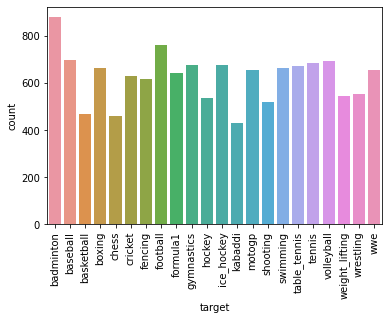

In [20]:
ax = sns.countplot(
    df['target'],
    
)
ax.set_xticklabels(labels.values(), rotation=90);

### Creating dataets

In [7]:
train_df, val_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])


In [22]:
train_df.shape, val_df.shape, test_df.shape

((11040, 2), (1380, 2), (1380, 2))

In [8]:
train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [24]:
print(train_df.head(5))


   index                              image_path  target
0  10851      input/data/gymnastics/00000219.jpg     9.0
1   6686           input/data/chess/00000409.jpg     4.0
2   1448  input/data/weight_lifting/00000286.jpg    19.0
3  11819        input/data/shooting/00000466.jpg    14.0
4   6390      input/data/gymnastics/00000169.jpg     9.0


In [25]:
print(train_df["image_path"][0])


input/data/gymnastics/00000219.jpg


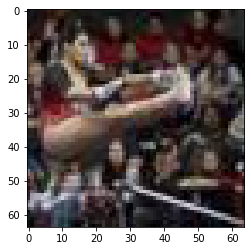

In [26]:
img = Image.open(train_df["image_path"][0])
plt.imshow(img)

### Image resizing

It is not neccesary to re-run this part if the dataset has already been resized

In [27]:
for path in train_df["image_path"]:
    img = Image.open(path) 
    new_width  = 64
    new_height = 64
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(path) 

### Creating the datasets

In [25]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(train_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(train_df["target"].to_list())


def decode_image(img):

    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    # Optional resize
    #return tf.image.resize(img, [img_height, img_widht])
    return img

def process_path(file_path):

    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    
    img = decode_image(img)
    return img

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
train_ds = tf.data.Dataset.zip((list_ds, label_ds))

# Checking
print(train_ds.element_spec)
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())


(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
Image shape:  (128, 128, 3)
Label:  19.0
